<a href="https://colab.research.google.com/github/JL-plusUltra/DataScience/blob/main/LogisticReg_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
############Binary Classifier###################
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from matplotlib.colors import ListedColormap

In [ ]:
cmap_bold= ListedColormap(["#FF0000","#0000FF"])
cmap_light= ListedColormap(["#FFBBBB","#BBBBFF"])

In [ ]:
def sigmoid(h):
  return 1/(1+np.exp(-h))

In [ ]:
def cross_entropy(y,p_hat):
  return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

In [ ]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [ ]:
class LogisticRegression():
  def __init__(self, thresh=0.5):
    self.thresh=thresh
    self.W=None
    self.B=None

  def fit(self,X,y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs= int(epochs)
    N,D= X.shape

    self.W= np.random.randn(D)
    self.B= np.random.randn(1)

    J= np.zeros(epochs)

    for epoch in range(epochs):
      p_hat=self.__forward__(X)
      J[epoch]= cross_entropy(y,p_hat)

      self.W-= eta* (1/N)*X.T@(p_hat-y)
      self.B -= eta*(1/N)*np.sum(p_hat-y)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()
    
  def __forward__(self,X):
    return sigmoid(X@self.W+self.B)

  def predict(self, X):
    return (self.__forward__(X)>=self.thresh).astype(np.int32)


In [ ]:
def main():
    N = 1000
    D = 2
    
    X0 = np.random.randn((N//2),D) + np.array([1, 1])
    X1 = np.random.randn((N//2),D) + np.array([-1, -1])
    X = np.vstack((X0, X1))
    
    y = np.array([0]*(N//2) + [1]*(N//2))
    
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5)
    plt.show()
    
    log_reg = LogisticRegression()
    log_reg.fit(X, y, eta = 1e-1, show_curve = True)
    y_hat = log_reg.predict(X)
    
    print(f"Training Accuracy: {accuracy(y, y_hat):0.4f}")
    
    x1 = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000)
    x2 = -(log_reg.B/log_reg.W[1]) - (log_reg.W[0]/log_reg.W[1])*x1
    
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5)
    plt.plot(x1, x2, color = "#000000", linewidth = 2)
    plt.show()
    
    xx1, xx2 = np.meshgrid(x1, x1)
    Z = log_reg.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)
    
    plt.figure()
    plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
    plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.show()

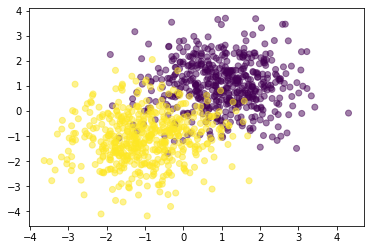

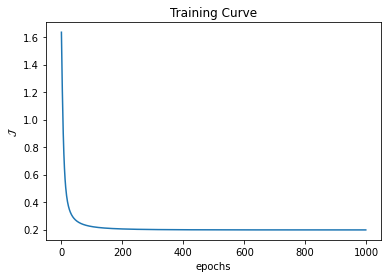

Training Accuracy: 0.9120


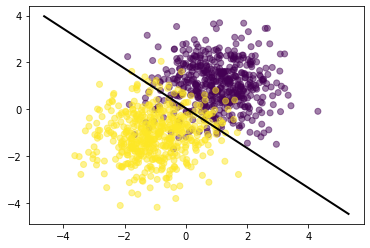

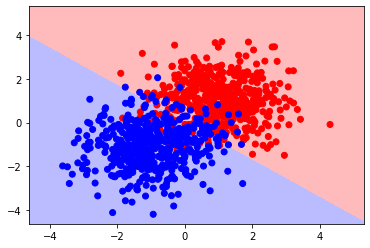

In [ ]:
if __name__=="__main__":
  main()